**Given a set of ordered matrices with dimentions n1 ×n2, n2 ×n3, ....nk ×nk+1, we want
to calculate their multiplication.**

**Construct an algorithm to find the optimal order of
associative multiplying (can multiply ((M1M2)M3)M4 or M1((M2M3)M4) or
(M1M2)(M3M4) or ... ) such that the complexity of the entire matrix multiplication
would be minimal. (Complexity of multiplying two matrices of dimentions n × m and
m × l is n  m  l).**

**What is the complexity of the algorithm (as function of k)? **

**How much memory does it require? Implement the algorithm and attach the code.**

**Hint: Follow the general logic of dynamic programming, define sub-problems that will
help you solve the bigger problem.**

if we start from the full matrix sequence, and then try every possible way to split it to two sub-sequences,
we can find the split which gives minimal cost by calling the function recursivly on every sub-sequence.

the smallest sub-problem is finding the minimal cost of a chain of two matrices and since there is only one way to multiply them the minimal complexity is just the complexity.

the algorithm is:
given a sequence, compute the complexity of every possible way to split it into two parts, for each sub sequence we encounter, we save the minimal complexity and the matching partition. and then for every sub sequence we check if that particular sub-sequence was already done.

for a sequence of length $n$, ABCDEF... we can compute the number of possible sub-sequences as a sum of an arithmatic series - first we have n subsequences A, AB, ABC, ABCD, etc, then n-1, B, BC, BCD,... which sums to $\frac{n}{2}(n+1)$. we can subtract elements of length 1 (A,B etc), but for large $n$ the order of magnitude of the number of values to be stored in memory is $\frac{1}{2} n^2$

the complexity of the algorithm is $O(n^3)$, since we are going to partition the whole sequence n times, and in each partition we will encounter something of the order of all sub-sequences - which are $\sim n^{2}$.

In [197]:

def matrixComp(n,m,l):
    return n*m*l

## recursive 
def MatrixOrder(names, dimensions,Memoization_dict):
    
    # if we have N matrices, dimensions is a list of length N+1,
    # with the dimensions of the i'th matrix being dimensions[i-1] X dimensions[i]
    n = len(dimensions)-1
    
    if n==1:
        
        return [0,names]
    
    
    if ':'.join(names) in Memoization_dict:
     
        return Memoization_dict[':'.join(names)]
    
    
    if(n==2):
        
        cost = matrixComp(dimensions[0],dimensions[1],dimensions[2])
        split = [names[0],names[1]]
        Memoization_dict[':'.join(names)] = [ cost, split ]
        return Memoization_dict[':'.join(names)]
    
    #for a matrix chain ABCDEFG
    #possible splits are after indexes 1 (A)(BCDEFG), 2 (AB)(CDEFG) 3, ... until after index N-2 (ABCDEF)(G) 
    
    cost = -1
    split = -1
    
    for splitindex in range(1,n):
        
        subseq1 = dimensions[0:splitindex+1]
        
        namesSeq1 = names[0:splitindex]
        
        subseq2 = dimensions[splitindex:]
        
        namesSeq2 = names[splitindex :]
        
        #print namesSeq1,' ',namesSeq2
        #print subseq1, ' ',subseq2
        #print '------------------'
        
        cost1, split1 = MatrixOrder(namesSeq1,subseq1,Memoization_dict)
        cost2, split2 = MatrixOrder(namesSeq2,subseq2,Memoization_dict)
        
        totalcost = cost1+cost2+subseq1[0]*subseq2[0]*subseq2[-1]
        
        #print 'totalcost ',totalcost
        
        if cost<0 or totalcost < cost:
            cost = totalcost
            split = [split1,split2]
        
    
    Memoization_dict[':'.join(names)] = [ cost, split ]
    return cost, split



lets test with a simple 3 matrix case:

In [223]:
Memoization_dict = {}
matrixNames = ['A','B','C']
dimesions = [10,30,5,60]
MatrixOrder(matrixNames, dimesions,Memoization_dict)

(4500, [['A', 'B'], ['C']])

good, this is consistent with the example in
https://en.wikipedia.org/wiki/Matrix_chain_multiplication

now we can experimentallly verify that the algorithm operate in O(n^3) time and the memory required is O(0.5*n^2)

In [201]:
import random
import datetime

def RandomTest(k):
    # create test matrix chain
    # k-1 is the number of matrices in chain
    #k = 100
    
    samplechain = []
    matrixNames = []
    
    for x in range(k):
        if x < k-1:
            matrixNames.append( str(x) )
        
        samplechain.append(random.randint(1,60))
    
    #print matrixNames
    #print samplechain
    
    Memoization_dict = {}
    starttime = datetime.datetime.now()
    cost, split = MatrixOrder(matrixNames, samplechain,Memoization_dict)
    endtime = datetime.datetime.now()
    
    return [k-1,int ( ((endtime-starttime).microseconds)/1000 ) , len(Memoization_dict)]


In [226]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

xaxis_n = []
yaxis_time = []
yaxis_memory = []

for k in range(50,100):
    n,t,memsize = RandomTest(k)
    xaxis_n.append(n)
    yaxis_time.append(t)
    yaxis_memory.append(memsize)



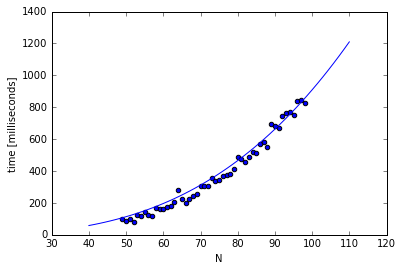

In [227]:
x = np.linspace(40,110,50)
y = (1.0/1100)*x**3

plt.scatter(xaxis_n, yaxis_time)
plt.xlabel('N')
plt.ylabel('time [milliseconds]')
plt.plot(x,y)
plt.show()

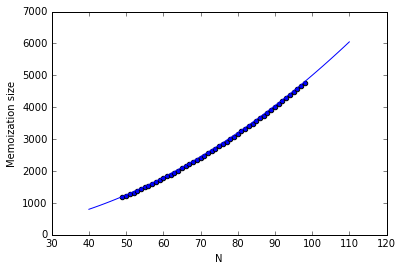

In [228]:
x = np.linspace(40,110,50)
y = (1.0/2)*x**2

plt.scatter(xaxis_n, yaxis_memory)
plt.xlabel('N')
plt.ylabel('Memoization size')
plt.plot(x,y)
plt.show()